___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Import Libraries

In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [714]:
df = pd.read_csv('Churn_Modelling.csv')

In [715]:
#from google.colab import drive
#drive.mount('/content/drive')

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [716]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [718]:
df.RowNumber.value_counts().sum() # drop 

10000

In [719]:
df.CustomerId.value_counts().sum() # drop

10000

In [720]:
df.CreditScore.value_counts().sum()   # drop

10000

In [721]:
df.Geography.value_counts()   # get_dummy

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [722]:
df.Gender.value_counts()   # get_dummy

Male      5457
Female    4543
Name: Gender, dtype: int64

In [723]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

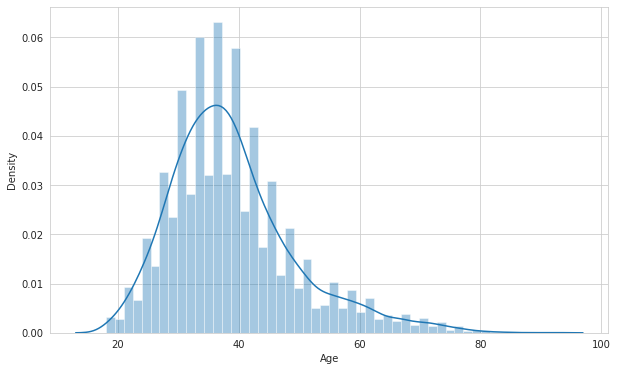

In [724]:
sns.distplot(df.Age);

In [725]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

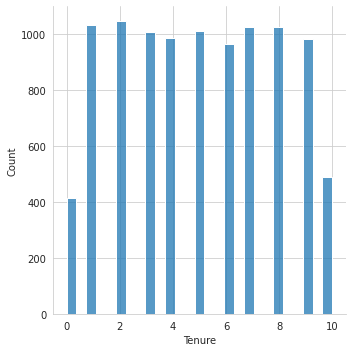

In [726]:
sns.displot(df.Tenure);

In [727]:
df.Balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

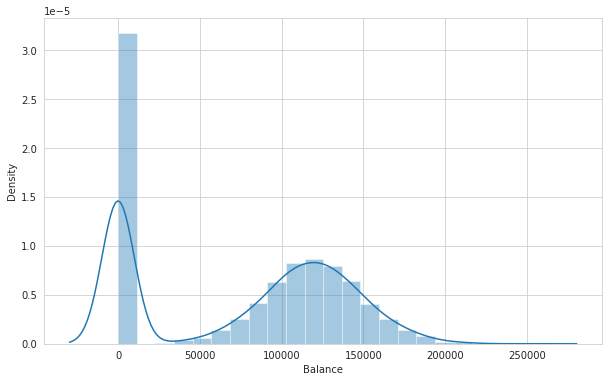

In [728]:
sns.distplot(df.Balance);

In [729]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [730]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [731]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [732]:
df.EstimatedSalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

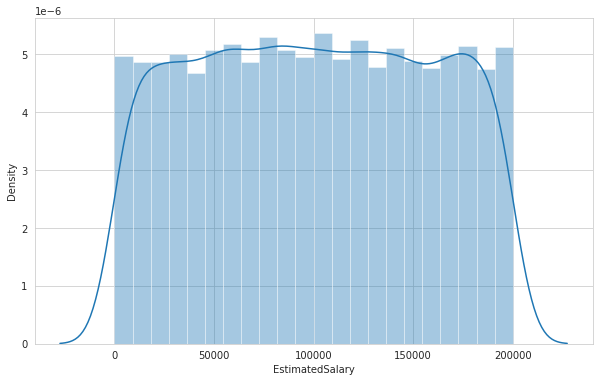

In [733]:
sns.distplot(df.EstimatedSalary);

In [734]:
df.Exited.value_counts()   #unbalanced

0    7963
1    2037
Name: Exited, dtype: int64

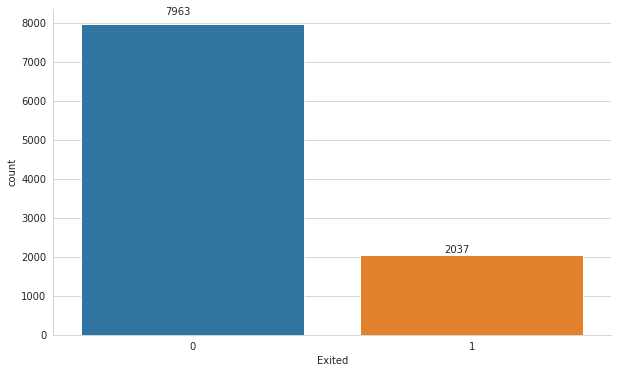

In [735]:
ax = sns.countplot(df.Exited)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));



In [736]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [737]:
df.head().T

,0,1,2,3,4
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.000,83807.860,159660.800,0.000,125510.820
NumOfProducts,1,1,3,2,1
HasCrCard,1,0,1,0,1
IsActiveMember,1,1,0,0,1
EstimatedSalary,101348.880,112542.580,113931.570,93826.630,79084.100


In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [739]:
df = pd.get_dummies(df, drop_first=True)

In [740]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [741]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000
Geography_Germany,10000.000,0.251,0.434,0.000,0.000,0.000,1.000,1.000


In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


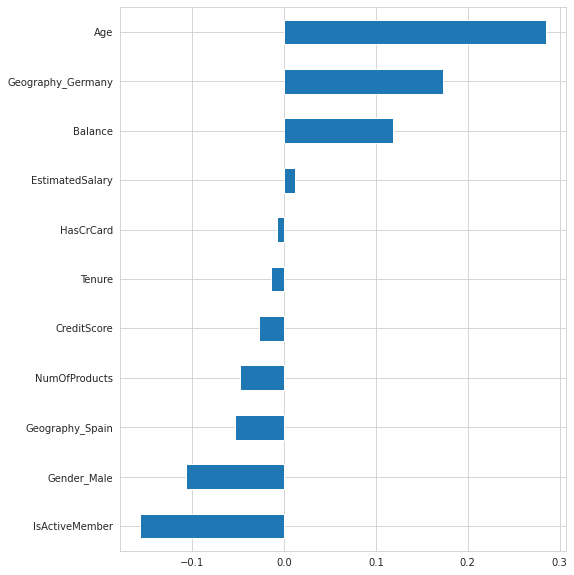

In [743]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

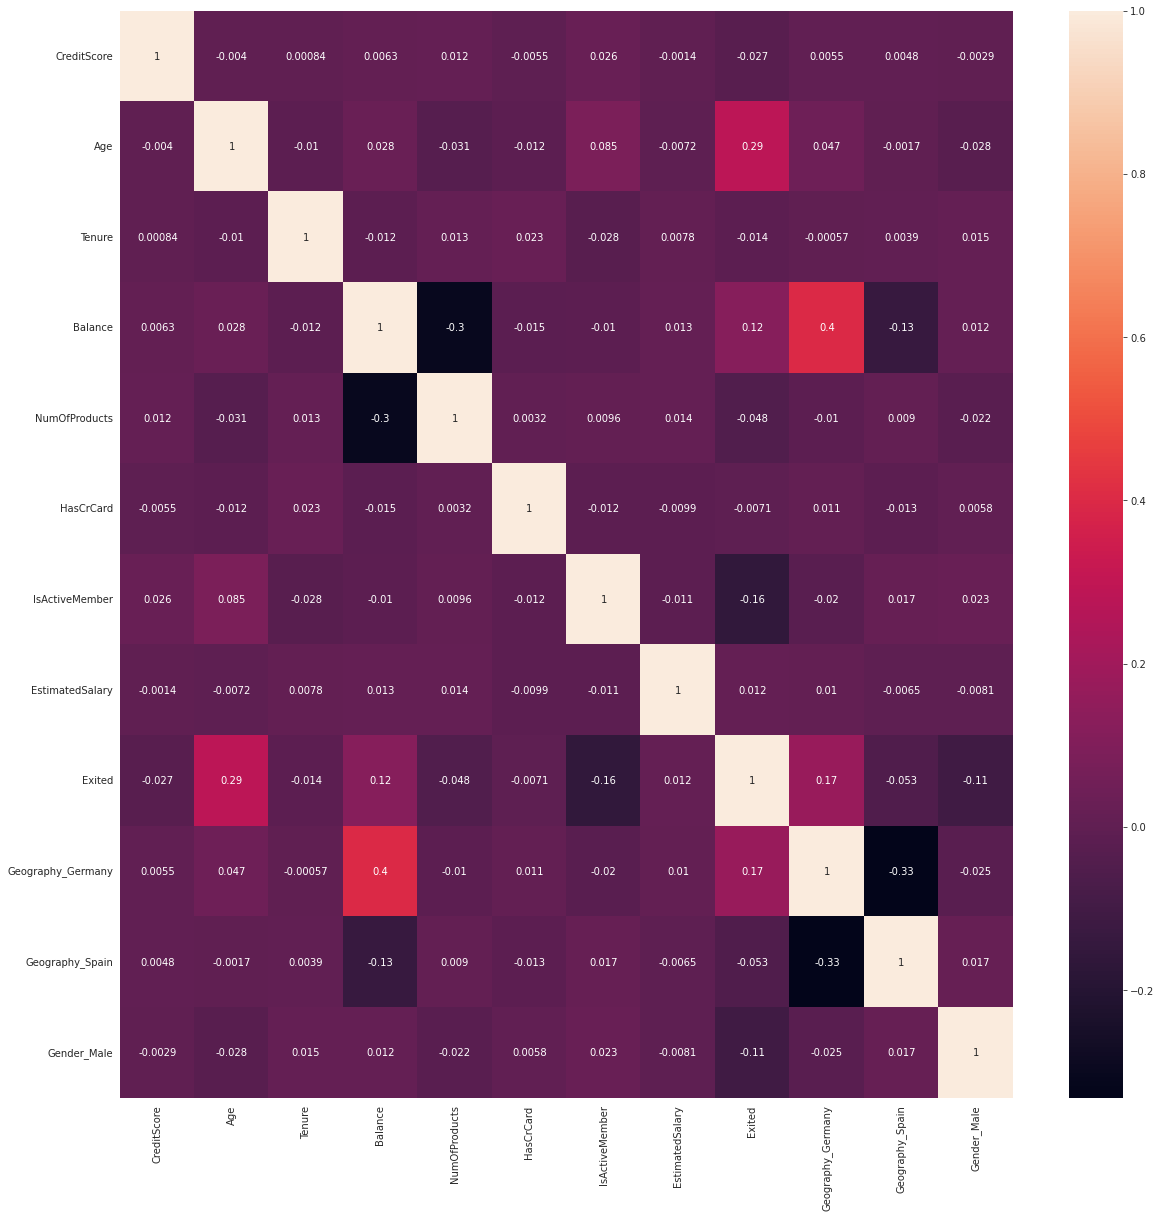

In [744]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

## Preprocessing of Data
- Train | Test Split, Scalling

In [746]:
from sklearn.model_selection import train_test_split

In [747]:
X = df.drop('Exited', axis=1)

In [748]:
y = df.Exited

In [749]:
seed=42

In [750]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [751]:
from sklearn.preprocessing import MinMaxScaler

In [752]:
scaler = MinMaxScaler()

In [753]:
X_train = scaler.fit_transform(X_train)

In [754]:
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [755]:
import tensorflow as tf

In [756]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [757]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [758]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [759]:
df.shape

(10000, 12)

# Creating Model

#Vanilla Model :

In [760]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [761]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])     # loss = ['recall', 'precision', 'accuracy']

In [762]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.7814 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7953 - val_loss: 0.4476 - val_accuracy: 0.8000
Epoch 3/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8016 - val_loss: 0.4354 - val_accuracy: 0.8075
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8128 - val_loss: 0.4283 - val_accuracy: 0.8275
Epoch 5/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8150 - val_loss: 0.4192 - val_accuracy: 0.8338
Epoch 6/300
200/200 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8197 - val_loss: 0.4057 - val_accuracy: 0.8406
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8406

In [763]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_221 (Dense)           (None, 18)                216       
                                                                 
 dense_222 (Dense)           (None, 18)                342       
                                                                 
 dense_223 (Dense)           (None, 9)                 171       
                                                                 
 dense_224 (Dense)           (None, 9)                 90        
                                                                 
 dense_225 (Dense)           (None, 1)                 10        
                                                                 
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [764]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.528,0.781,0.460,0.800
1,0.457,0.795,0.448,0.800
2,0.441,0.802,0.435,0.808
3,0.428,0.813,0.428,0.827
4,0.418,0.815,0.419,0.834


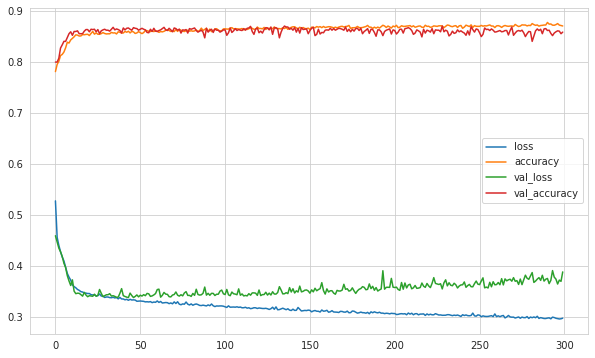

In [765]:
loss_df.plot();

In [766]:
model.evaluate(X_test, y_test, verbose=0)  

[0.37384676933288574, 0.8514999747276306]

In [767]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37384676933288574
accuracy :  0.8514999747276306


In [768]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1525   68]
 [ 229  178]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [769]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

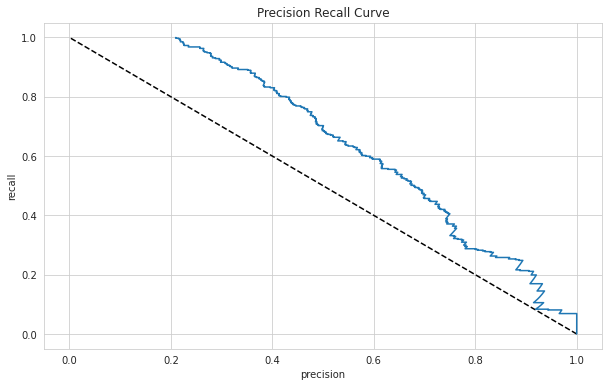

In [770]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [771]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20968573, 0.20927835, 0.20938628, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([8.880496e-04, 9.199679e-04, 9.278059e-04, ..., 9.999374e-01,
        9.999558e-01, 9.999591e-01], dtype=float32))

# Without class_weigth

### With EarlyStop

In [772]:
from tensorflow.keras.callbacks import EarlyStopping

In [773]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [774]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [775]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.7814 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4566 - accuracy: 0.7953 - val_loss: 0.4476 - val_accuracy: 0.8000
Epoch 3/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8016 - val_loss: 0.4354 - val_accuracy: 0.8075
Epoch 4/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8128 - val_loss: 0.4283 - val_accuracy: 0.8275
Epoch 5/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8150 - val_loss: 0.4192 - val_accuracy: 0.8338
Epoch 6/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8197 - val_loss: 0.4057 - val_accuracy: 0.8406
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8406

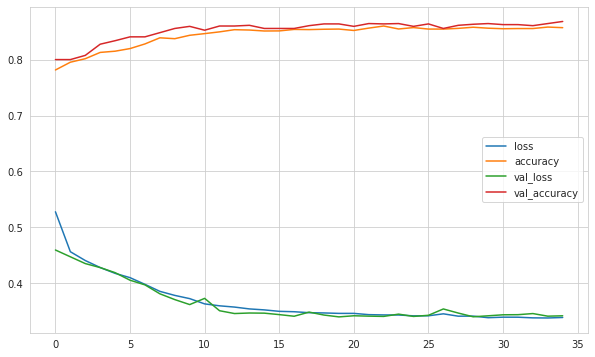

In [776]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [777]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35064950585365295
accuracy :  0.8525000214576721


In [778]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1513   80]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.47      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



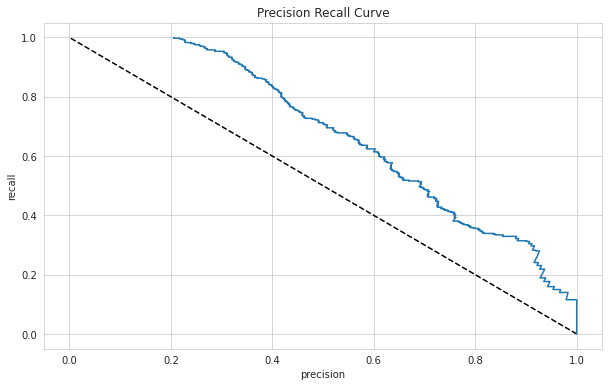

In [779]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [780]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20545179, 0.20505051, 0.20515412, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.00372416, 0.00405174, 0.0040547 , ..., 0.9847486 , 0.98745793,
        0.9888399 ], dtype=float32))

### Wıth learning_rate   

In [781]:
from tensorflow.keras.optimizers import Adam

In [782]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [783]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [784]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4888 - accuracy: 0.7902 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8042 - val_loss: 0.4236 - val_accuracy: 0.8269
Epoch 3/300
200/200 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8205 - val_loss: 0.3955 - val_accuracy: 0.8519
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3940 - accuracy: 0.8359 - val_loss: 0.3729 - val_accuracy: 0.8512
Epoch 5/300
200/200 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8475 - val_loss: 0.3469 - val_accuracy: 0.8625
Epoch 6/300
200/200 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8445 - val_loss: 0.3539 - val_accuracy: 0.8531
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8459 - val_loss: 0.3451 - val_accuracy: 0.8719

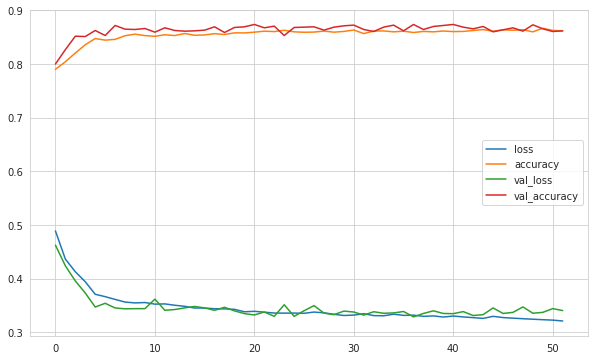

In [785]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [786]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3504556715488434
accuracy :  0.8554999828338623


In [787]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1562   31]
 [ 258  149]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



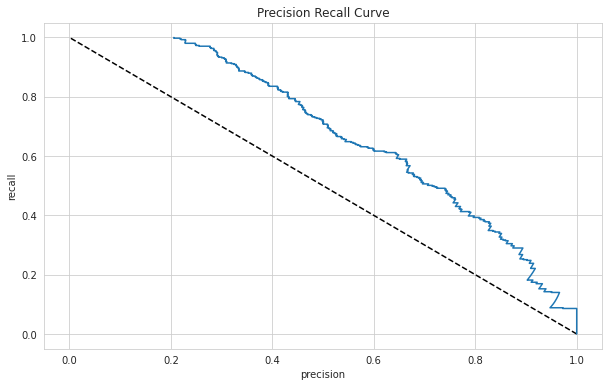

In [788]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [789]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20597166, 0.20556962, 0.20567376, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.00387794, 0.00407547, 0.00408828, ..., 0.999966  , 0.99999857,
        0.9999995 ], dtype=float32))

### With Dropout

In [790]:
from tensorflow.keras.layers import Dropout

In [791]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [792]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose = 1)

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.6041 - accuracy: 0.7506 - val_loss: 0.5226 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5512 - accuracy: 0.7939 - val_loss: 0.5104 - val_accuracy: 0.8000
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5323 - accuracy: 0.7950 - val_loss: 0.5030 - val_accuracy: 0.8000
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5243 - accuracy: 0.7953 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 5/300
200/200 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7955 - val_loss: 0.4926 - val_accuracy: 0.8000
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5142 - accuracy: 0.7948 - val_loss: 0.4889 - val_accuracy: 0.8000
Epoch 7/300
200/200 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7950 - val_loss: 0.4855 - val_accuracy: 0.8000

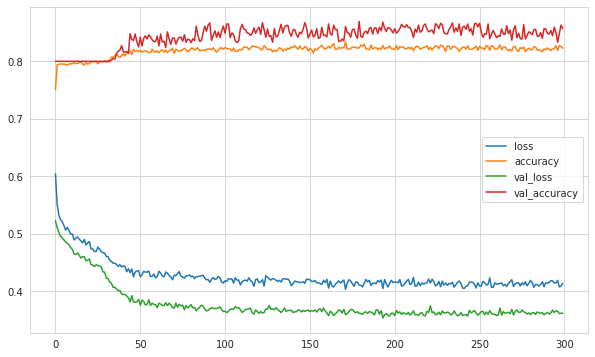

In [793]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [794]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36608338356018066
accuracy :  0.8420000076293945


In [795]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1576   17]
 [ 299  108]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1593
           1       0.86      0.27      0.41       407

    accuracy                           0.84      2000
   macro avg       0.85      0.63      0.66      2000
weighted avg       0.85      0.84      0.81      2000



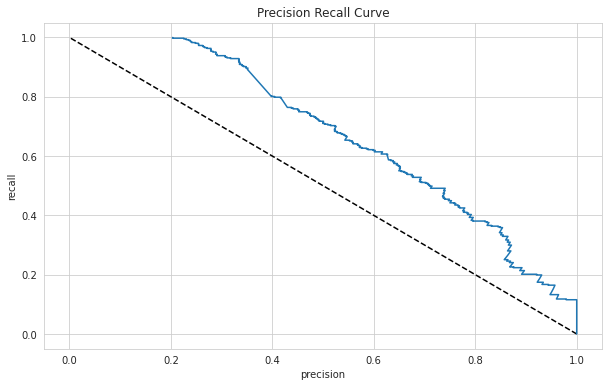

In [796]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [797]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.2035    , 0.20310155, 0.2032032 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.01488978, 0.01614869, 0.01680201, ..., 0.9930024 , 0.9943806 ,
        0.9974026 ], dtype=float32))

# With class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Vanilla Model

In [798]:
from sklearn.utils import class_weight

In [799]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [800]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [801]:
class_weights

array([0.62794349, 2.45398773])

In [802]:
class_weight = {0:0.62637018, 1:2.47831475}

In [803]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6749 - accuracy: 0.4880 - val_loss: 0.6228 - val_accuracy: 0.7406
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6239 - accuracy: 0.6784 - val_loss: 0.6439 - val_accuracy: 0.6406
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5954 - accuracy: 0.6928 - val_loss: 0.5853 - val_accuracy: 0.7069
Epoch 4/300
200/200 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7109 - val_loss: 0.5807 - val_accuracy: 0.7006
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5523 - accuracy: 0.7272 - val_loss: 0.5262 - val_accuracy: 0.7481
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.7334 - val_loss: 0.5530 - val_accuracy: 0.7163
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7375 - val_loss: 0.5367 - val_accuracy: 0.7300

In [804]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_241 (Dense)           (None, 18)                216       
                                                                 
 dense_242 (Dense)           (None, 18)                342       
                                                                 
 dense_243 (Dense)           (None, 9)                 171       
                                                                 
 dense_244 (Dense)           (None, 9)                 90        
                                                                 
 dense_245 (Dense)           (None, 1)                 10        
                                                                 
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [805]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675,0.488,0.623,0.741
1,0.624,0.678,0.644,0.641
2,0.595,0.693,0.585,0.707
3,0.570,0.711,0.581,0.701
4,0.552,0.727,0.526,0.748


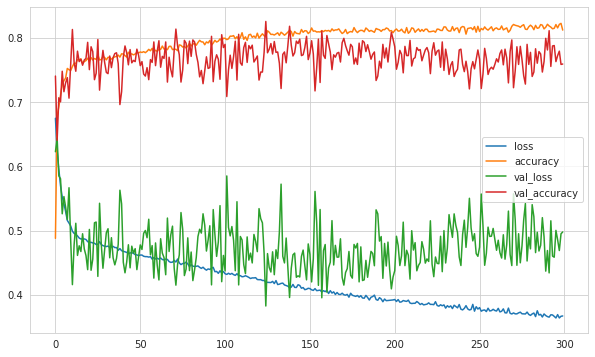

In [806]:
loss_df.plot();

In [807]:
model.evaluate(X_test, y_test, verbose=0)  

[0.5348471403121948, 0.7484999895095825]

In [808]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5348471403121948
accuracy :  0.7484999895095825


In [809]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1198  395]
 [ 108  299]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1593
           1       0.43      0.73      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.75      0.77      2000



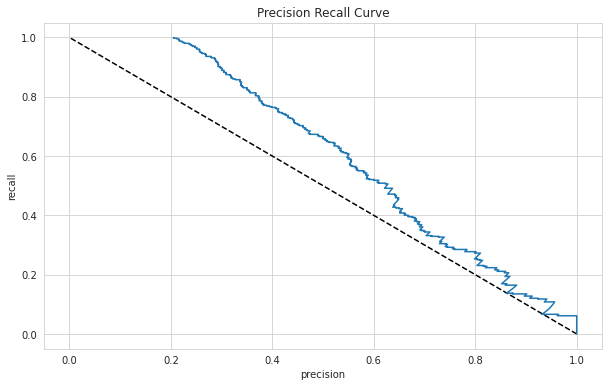

In [810]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [811]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20534813, 0.204947  , 0.20505051, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([1.6302954e-07, 1.7263962e-07, 1.7533053e-07, ..., 9.9997860e-01,
        9.9998903e-01, 9.9999279e-01], dtype=float32))

### class_weight-Early Stop

In [812]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [813]:
class_weight = {0:0.62637018, 1:2.47831475}

In [814]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [815]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.6749 - accuracy: 0.4880 - val_loss: 0.6228 - val_accuracy: 0.7406
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6239 - accuracy: 0.6784 - val_loss: 0.6439 - val_accuracy: 0.6406
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5954 - accuracy: 0.6928 - val_loss: 0.5853 - val_accuracy: 0.7069
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5699 - accuracy: 0.7109 - val_loss: 0.5807 - val_accuracy: 0.7006
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5523 - accuracy: 0.7272 - val_loss: 0.5262 - val_accuracy: 0.7481
Epoch 6/300
200/200 [==============================] - 1s 4ms/step - loss: 0.5420 - accuracy: 0.7334 - val_loss: 0.5530 - val_accuracy: 0.7163
Epoch 7/300
200/200 [==============================] - 1s 4ms/step - loss: 0.5298 - accuracy: 0.7375 - val_loss: 0.5367 - val_accuracy: 0.7300

In [816]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.675,0.488,0.623,0.741
1,0.624,0.678,0.644,0.641
2,0.595,0.693,0.585,0.707
3,0.570,0.711,0.581,0.701
4,0.552,0.727,0.526,0.748


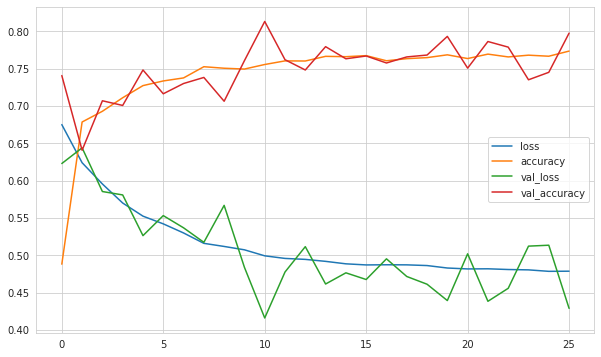

In [817]:
loss_df.plot();

In [818]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.43303462862968445
accuracy :  0.7919999957084656


In [819]:
model.evaluate(X_test, y_test, verbose=0)  

[0.43303462862968445, 0.7919999957084656]

In [820]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1307  286]
 [ 130  277]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.68      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000



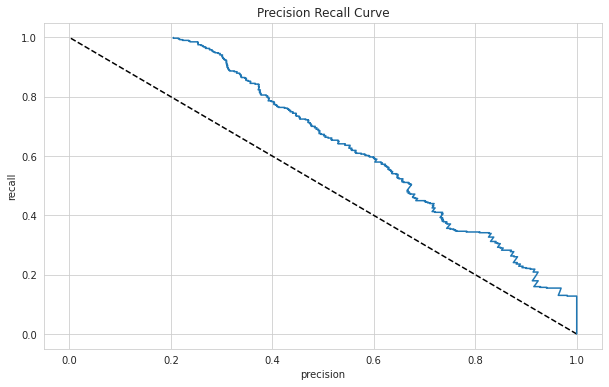

In [821]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [822]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20493454, 0.20453401, 0.2046371 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.01970676, 0.01972049, 0.02035898, ..., 0.9948368 , 0.99502856,
        0.9967159 ], dtype=float32))

####class_weight-Dropout

In [823]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [824]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [825]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.7044 - accuracy: 0.4773 - val_loss: 0.6906 - val_accuracy: 0.7188
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.5342 - val_loss: 0.6930 - val_accuracy: 0.6350
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5905 - val_loss: 0.6898 - val_accuracy: 0.6919
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5514 - val_loss: 0.6803 - val_accuracy: 0.7944
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.6564 - val_loss: 0.6752 - val_accuracy: 0.7700
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.6858 - val_loss: 0.6743 - val_accuracy: 0.7519
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6811 - accuracy: 0.6859 - val_loss: 0.6648 - val_accuracy: 0.7444

In [826]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.704,0.477,0.691,0.719
1,0.698,0.534,0.693,0.635
2,0.694,0.590,0.690,0.692
3,0.694,0.551,0.680,0.794
4,0.689,0.656,0.675,0.770


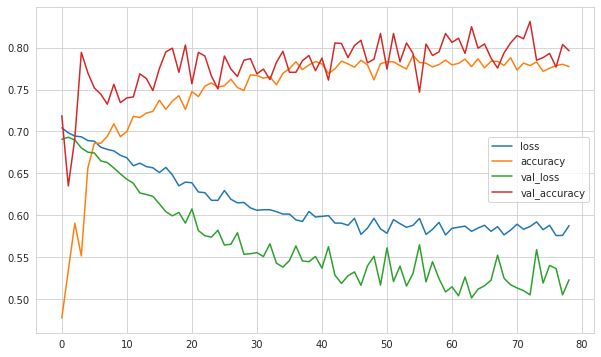

In [827]:
loss_df.plot();

In [828]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5247400403022766
accuracy :  0.7960000038146973


In [829]:
model.evaluate(X_test, y_test, verbose=0)  

[0.5247400403022766, 0.7960000038146973]

In [830]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1300  293]
 [ 115  292]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1593
           1       0.50      0.72      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



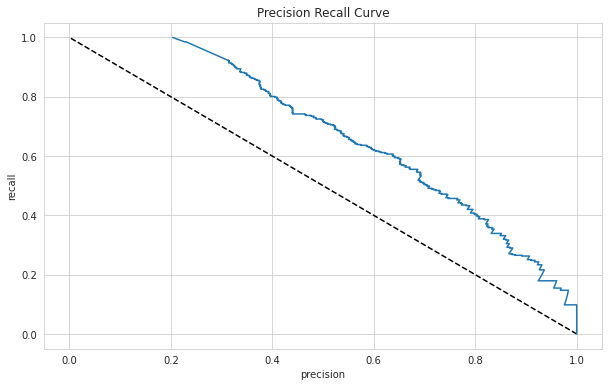

In [831]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [832]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.2035    , 0.22642575, 0.22655367, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 0.98525799, 0.98525799, ..., 0.004914  , 0.002457  ,
        0.        ]),
 array([0.31644404, 0.3164487 , 0.3164571 , ..., 0.9988495 , 0.9993875 ,
        0.9995836 ], dtype=float32))

# Smote

In [833]:
#pip install imbalanced-learn

In [834]:
from imblearn.over_sampling import SMOTE

In [835]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [836]:
smote = SMOTE(sampling_strategy = 'minority')

In [838]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [839]:
scaler = MinMaxScaler()

In [840]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [841]:
X_sm = smote.fit_resample(X_train, y_train)

In [842]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [843]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [844]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [845]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7814 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4566 - accuracy: 0.7953 - val_loss: 0.4476 - val_accuracy: 0.8000
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.8016 - val_loss: 0.4354 - val_accuracy: 0.8075
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8128 - val_loss: 0.4283 - val_accuracy: 0.8275
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8150 - val_loss: 0.4192 - val_accuracy: 0.8338
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8197 - val_loss: 0.4057 - val_accuracy: 0.8406
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8406

In [846]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.528,0.781,0.460,0.800
1,0.457,0.795,0.448,0.800
2,0.441,0.802,0.435,0.808
3,0.428,0.813,0.428,0.827
4,0.418,0.815,0.419,0.834


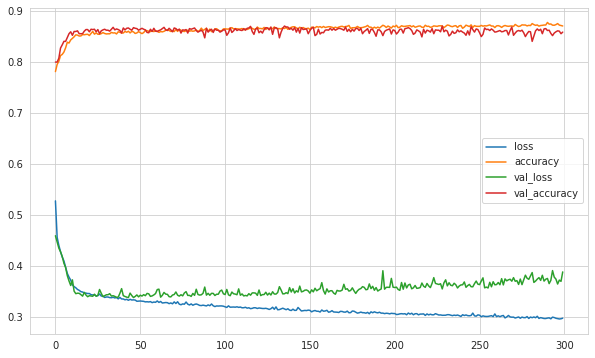

In [847]:
loss_df.plot();

In [848]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37384676933288574
accuracy :  0.8514999747276306


In [849]:
model.evaluate(X_test, y_test, verbose=0)

[0.37384676933288574, 0.8514999747276306]

In [850]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1525   68]
 [ 229  178]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [851]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

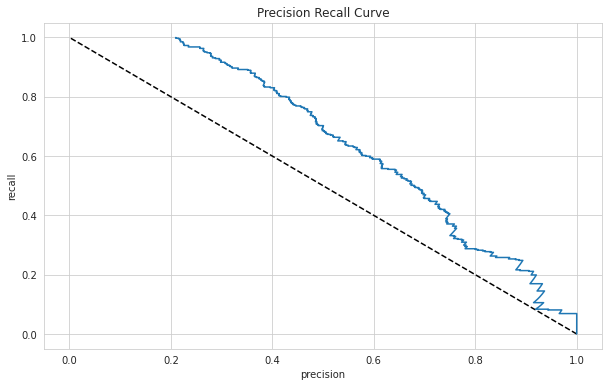

In [852]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [853]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20968573, 0.20927835, 0.20938628, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([8.880496e-04, 9.199679e-04, 9.278059e-04, ..., 9.999374e-01,
        9.999558e-01, 9.999591e-01], dtype=float32))

###Smote-Early Stop

In [854]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [855]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [856]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.6749 - accuracy: 0.4880 - val_loss: 0.6228 - val_accuracy: 0.7406
Epoch 2/300
200/200 [==============================] - 1s 4ms/step - loss: 0.6239 - accuracy: 0.6784 - val_loss: 0.6439 - val_accuracy: 0.6406
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5954 - accuracy: 0.6928 - val_loss: 0.5853 - val_accuracy: 0.7069
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5699 - accuracy: 0.7109 - val_loss: 0.5807 - val_accuracy: 0.7006
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5523 - accuracy: 0.7272 - val_loss: 0.5262 - val_accuracy: 0.7481
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.7334 - val_loss: 0.5530 - val_accuracy: 0.7163
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7375 - val_loss: 0.5367 - val_accuracy: 0.7300

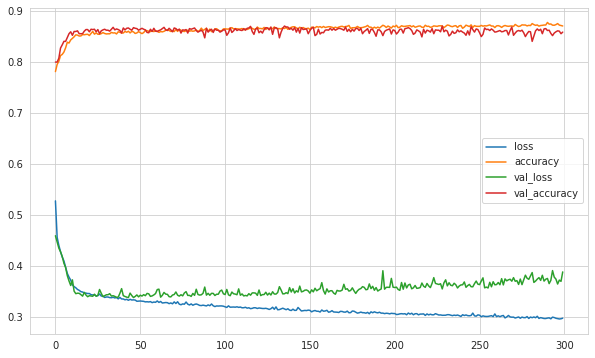

In [857]:
loss_df.plot();

In [858]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.43303462862968445
accuracy :  0.7919999957084656


In [859]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1307  286]
 [ 130  277]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.68      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000



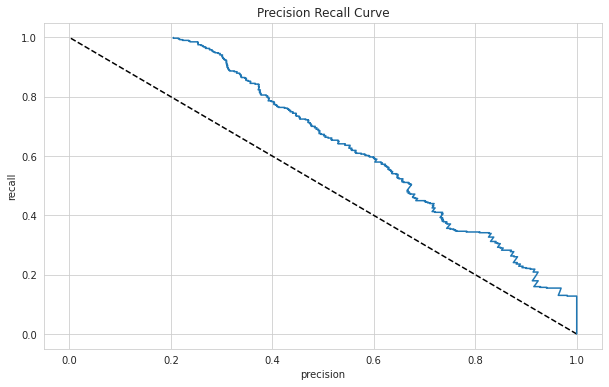

In [860]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [861]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20493454, 0.20453401, 0.2046371 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.01970676, 0.01972049, 0.02035898, ..., 0.9948368 , 0.99502856,
        0.9967159 ], dtype=float32))

### Ensemble Method

In [862]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [863]:
X = df.drop('Exited', axis = 1)
y = df.Exited

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [865]:
scaler = MinMaxScaler()

In [866]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [867]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [868]:
df_class0 = df[df.Exited==0]
df_class1 = df[df.Exited==1]

In [869]:
 df_class0.shape, df_class1.shape

((7963, 12), (2037, 12))

In [870]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
  
  X = df.drop('Exited', axis = 1)
  y = df.Exited
  return X_train, y_train

In [871]:
X_train, y_train = get_train_batch(df_class0, df_class1, 0, 2037)

In [872]:
X_train.shape

(8000, 11)

In [873]:
y_train.shape

(8000,)

In [874]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [875]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 300, verbose=1)

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7814 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4566 - accuracy: 0.7953 - val_loss: 0.4476 - val_accuracy: 0.8000
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.8016 - val_loss: 0.4354 - val_accuracy: 0.8075
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8128 - val_loss: 0.4283 - val_accuracy: 0.8275
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8150 - val_loss: 0.4192 - val_accuracy: 0.8338
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8197 - val_loss: 0.4057 - val_accuracy: 0.8406
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8280 - val_loss: 0.3974 - val_accuracy: 0.8406

In [876]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.528,0.781,0.460,0.800
1,0.457,0.795,0.448,0.800
2,0.441,0.802,0.435,0.808
3,0.428,0.813,0.428,0.827
4,0.418,0.815,0.419,0.834


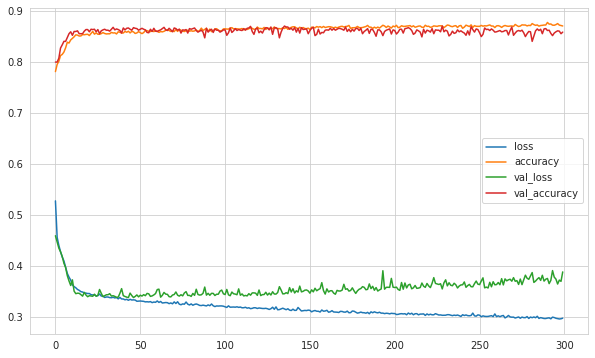

In [877]:
loss_df.plot();

In [878]:
model.evaluate(X_test, y_test, verbose=0)    

[0.37384676933288574, 0.8514999747276306]

In [879]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37384676933288574
accuracy :  0.8514999747276306


In [880]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1525   68]
 [ 229  178]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



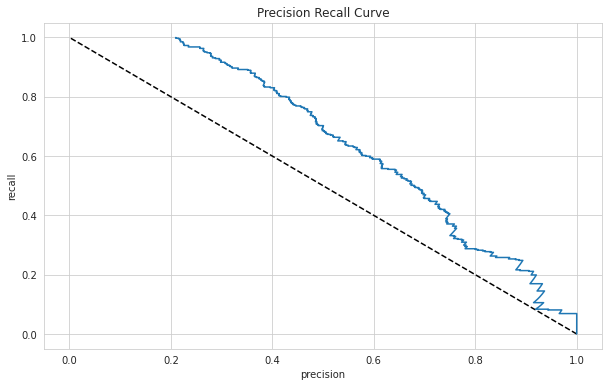

In [881]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [882]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20968573, 0.20927835, 0.20938628, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([8.880496e-04, 9.199679e-04, 9.278059e-04, ..., 9.999374e-01,
        9.999558e-01, 9.999591e-01], dtype=float32))

### Ensemble Method-Early Stop

In [883]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [884]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [885]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
200/200 [==============================] - 1s 4ms/step - loss: 0.6749 - accuracy: 0.4880 - val_loss: 0.6228 - val_accuracy: 0.7406
Epoch 2/300
200/200 [==============================] - 1s 3ms/step - loss: 0.6239 - accuracy: 0.6784 - val_loss: 0.6439 - val_accuracy: 0.6406
Epoch 3/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5954 - accuracy: 0.6928 - val_loss: 0.5853 - val_accuracy: 0.7069
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5699 - accuracy: 0.7109 - val_loss: 0.5807 - val_accuracy: 0.7006
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5523 - accuracy: 0.7272 - val_loss: 0.5262 - val_accuracy: 0.7481
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.7334 - val_loss: 0.5530 - val_accuracy: 0.7163
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7375 - val_loss: 0.5367 - val_accuracy: 0.7300

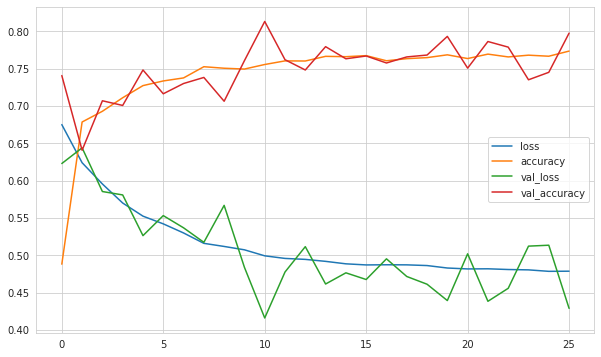

In [886]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [887]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.43303462862968445
accuracy :  0.7919999957084656


In [888]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1307  286]
 [ 130  277]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.68      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000



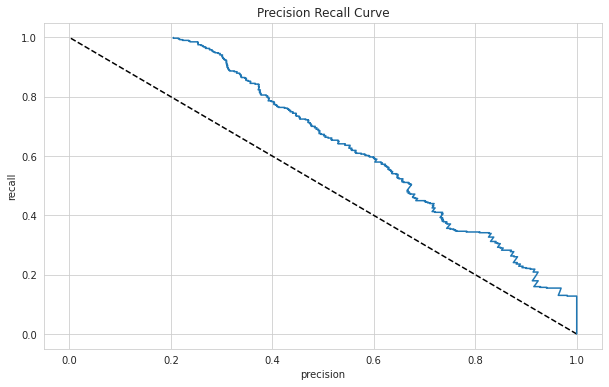

In [889]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [890]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.20493454, 0.20453401, 0.2046371 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.997543, 0.997543, ..., 0.004914, 0.002457, 0.      ]),
 array([0.01970676, 0.01972049, 0.02035898, ..., 0.9948368 , 0.99502856,
        0.9967159 ], dtype=float32))

## GridSearchCV

In [891]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [892]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [893]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [894]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [895]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.2, class_weight = class_weight, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
200/200 [==============================] - 2s 3ms/step - loss: 0.6346 - accuracy: 0.6552 - val_loss: 0.5009 - val_accuracy: 0.7969
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7025 - val_loss: 0.5572 - val_accuracy: 0.7100
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5542 - accuracy: 0.7189 - val_loss: 0.4721 - val_accuracy: 0.7812
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5291 - accuracy: 0.7337 - val_loss: 0.4449 - val_accuracy: 0.7819
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7494 - val_loss: 0.4354 - val_accuracy: 0.7875
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7542 - val_loss: 0.4410 - val_accuracy: 0.7875
Epoch 7/200
200/200 [==============================] - 1s 3ms/step - loss: 0.50

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fde7fa35350>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [896]:
grid_model.best_score_

0.793125

In [897]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [898]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
9,0.793,0.024,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
5,0.793,0.029,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
11,0.789,0.019,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
23,0.788,0.027,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
16,0.786,0.017,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.784,0.028,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
19,0.777,0.019,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
17,0.774,0.035,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
21,0.774,0.035,9,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
12,0.773,0.010,10,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."


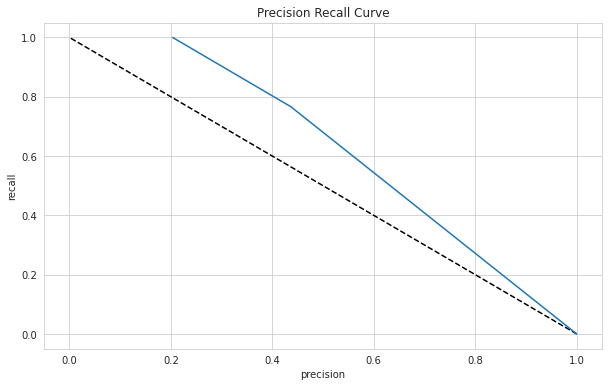

In [899]:
y_pred_proba = grid_model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [900]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.2035    , 0.43636364, 1.        ]),
 array([1.        , 0.76658477, 0.        ]),
 array([0, 1]))

## Final Model and Model Deployment

In [902]:
import pickle
pickle.dump(scaler, open("scaler_final", 'wb'))

In [923]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [924]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [925]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), class_weight = class_weight, batch_size = 32, epochs = 300, verbose = 1,
          callbacks = [early_stop])

Epoch 1/300
250/250 [==============================] - 1s 3ms/step - loss: 0.6655 - accuracy: 0.5533 - val_loss: 0.6525 - val_accuracy: 0.6525
Epoch 2/300
250/250 [==============================] - 1s 3ms/step - loss: 0.6113 - accuracy: 0.6801 - val_loss: 0.6026 - val_accuracy: 0.6825
Epoch 3/300
250/250 [==============================] - 1s 2ms/step - loss: 0.5797 - accuracy: 0.7075 - val_loss: 0.5132 - val_accuracy: 0.7555
Epoch 4/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5590 - accuracy: 0.7218 - val_loss: 0.4961 - val_accuracy: 0.7580
Epoch 5/300
250/250 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7424 - val_loss: 0.5108 - val_accuracy: 0.7440
Epoch 6/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.7502 - val_loss: 0.5127 - val_accuracy: 0.7370
Epoch 7/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5017 - accuracy: 0.7561 - val_loss: 0.4884 - val_accuracy: 0.7575

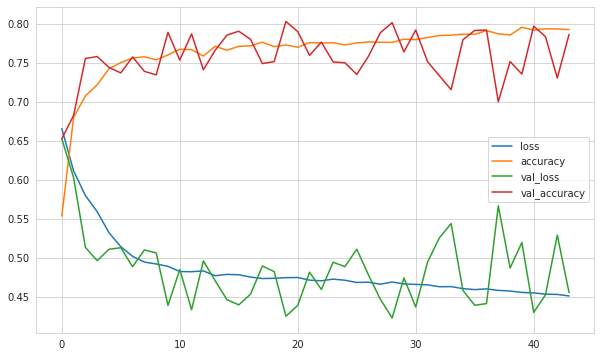

In [926]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [927]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.455060750246048
accuracy :  0.7864999771118164


In [928]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1263  330]
 [  97  310]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.48      0.76      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [909]:
model.save('model_final.h5')

####Loading model and Scaler

In [929]:
from tensorflow.keras.models import load_model

In [930]:
model_final = load_model('model_final.h5')
scaler_final = pickle.load(open("scaler_final", "rb"))

### Prediction

In [947]:
df_sample = df.drop('Exited', axis = 1).iloc[1:2, :]
df_sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0


In [948]:
df_sample = scaler_final.transform(df_sample)
df_sample

array([[0.516     , 0.31081081, 0.1       , 0.35156138, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 1.        ,
        0.        ]])

In [949]:
(model_final.predict(df_sample) > 0.5).astype("int32")

array([[0]], dtype=int32)

In [950]:
df["Exited"].iloc[1]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___